## import modules

In [1]:
from numpy import genfromtxt
import numpy as np
import math
from pylab import *
import urllib
import os
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.metrics import mean_squared_error
from __future__ import division
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lmfit import Model
import pickle
pl.style.use('seaborn')
pl.rc('font',family='Arial')

## load model

In [12]:
exp_file = open('slpmodel-exp.pkl', 'rb')
model = pickle.load(exp_file)
exp_file.close()

## input values to predict
Required input variables: field (mT), frequency (kHz), size (nm) 
  
Data limits:  
field (mT): {6, 9, 12, 15, 18, 20}  
frequency (kHz): {176, 373, 744, 992}  
size (nm): {21.9, 23.1, 25.3, 27.7}  


In [13]:
field = 6
frequency = 176
size = 24

## predict SLP value

In [14]:
p = model.predict([[field, frequency, size]])
print("predicted SLP = {} W/g(Fe3O4)".format(p[0]))

predicted SLP = 10.995237518000948 W/g(Fe3O4)


## plot predicted point

In [15]:
changed_param = "size"

## import data for plotting

In [16]:
slpexp = pd.read_csv('SLP/SLP_exp.csv', delimiter=',')

## take subset of data for plotting

In [17]:
sub = slpexp

if changed_param == "field": param = field
else: sub = sub[(sub['field'] == field)]

if changed_param == "frequency": param = frequency
else: sub = sub[(sub['frequency'] == frequency)]

if changed_param == "size": param = size
else: sub = sub[(sub['size'] == size)]

sub = sub.sort_values(by=changed_param)

## plot

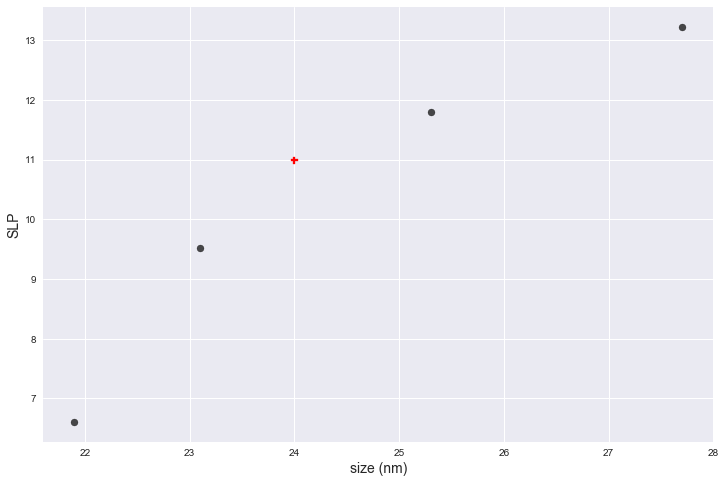

In [18]:
fig, ax = pl.subplots(figsize=(12,8))

scatter(sub[changed_param], sub['SLP'],c="black",alpha=0.7)
scatter(param, p, marker='P',c="red")
ylabel('SLP',fontsize=14)
xlabel('size (nm)',fontsize=14)

show()